## Exploratory Data Analysis

### Dataset feature description
**Age** is an important factor influencing cardiovascular diseases. The variable type is numerical. As age increases, the risk of arteriosclerosis and weakened cardiac function significantly rises .  

**Sex** is another critical risk factor, with a categorical variable type (`M` for male and `F` for female). 

**ChestPainType** refers to the type of chest pain and is a categorical variable (`TA`: Typical Angina, `ATA`: Atypical Angina, `NAP`: Non-Anginal Pain, `ASY`: Asymptomatic). Typical angina may indicate coronary artery disease, while asymptomatic patients could be a high-risk, latent group.  

**RestingBP**, representing resting blood pressure, is a critical indicator of blood pressure and is a numerical variable. Hypertension is often associated with myocardial hypertrophy and vascular sclerosis, significantly increasing the risk of heart disease.  

**Cholesterol** measures serum cholesterol levels and is a numerical variable. Elevated cholesterol can lead to atherosclerosis, a major cause of coronary artery disease.  

**FastingBS** indicates fasting blood sugar, recorded based on blood sugar levels in a fasting state. It is a categorical variable (`1` for >120 mg/dl, `0` for ≤120 mg/dl). This feature assesses whether a patient has diabetes, a significant risk factor for cardiovascular diseases.  

**RestingECG**, representing resting electrocardiogram results, provides basic ECG information and is a categorical variable (`Normal`: normal, `ST`: ST-T wave abnormality, `LVH`: left ventricular hypertrophy). Abnormal results may indicate insufficient myocardial blood supply or increased cardiac workload due to prolonged hypertension.  

**MaxHR** represents the maximum heart rate achieved during exercise testing and is a numerical variable (range 60–202). A lower maximum heart rate often reflects weaker cardiac function, making it a key indicator of heart disease risk. 

**ExerciseAngina** indicates exercise-induced angina, used to determine if a patient experiences angina during exercise. It is a categorical variable (`Y` for yes, `N` for no). Exercise-induced angina often suggests insufficient myocardial blood supply and is a significant clinical sign of coronary artery disease.  

**Oldpeak** reflects the ST depression after exercise and is a numerical variable. The ST segment is derived from electrocardiograms (ECG) and helps assess cardiac health and blood supply. Higher values indicate more severe myocardial ischemia, making it an important reference for diagnosing coronary artery disease.  

**ST_Slope** describes the shape of the ST segment in exercise ECGs and is a categorical variable (`Up`: upsloping, `Flat`: flat, `Down`: downsloping). An upsloping segment generally indicates normal blood supply, while a downsloping segment may suggest myocardial ischemia or even infarction.  

**HeartDisease** is the target variable that records whether a patient has heart disease, with a categorical variable type (`1` for heart disease, `0` for no heart disease).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss

### Load The Dataset

In [2]:
# Load The Dataset
data = pd.read_csv(r"D:\ML_Project\heart.csv")

In [3]:
# Basic Data Overview
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
# Check for duplicate data
print(data.duplicated().sum())

0


In [6]:
# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [7]:
# Convert FastingBS to string (categorical type)
data['FastingBS'] = data['FastingBS'].astype(str)

In [8]:
# Verify the change
print(data['FastingBS'].dtypes)

object


HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


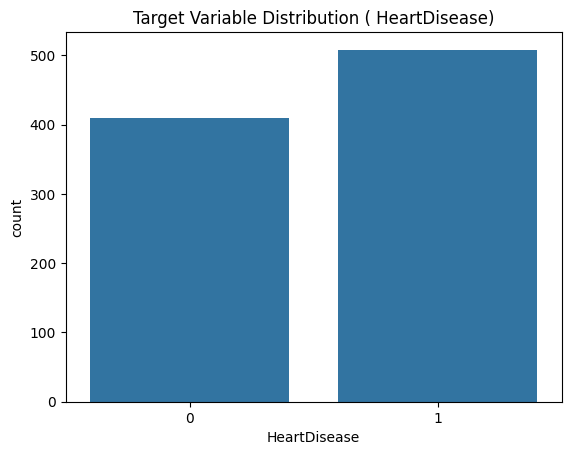

In [9]:
# Examine the distribution of the target variable to check for data imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# View the distribution
print(data['HeartDisease'].value_counts(normalize=True))

# Visualize the data
sns.countplot(x='HeartDisease', data=data)
plt.title("Target Variable Distribution ( HeartDisease)")
plt.show()


In [10]:
# View descriptive statistics of the data (numeric columns only)
print(data.describe())

              Age   RestingBP  Cholesterol       MaxHR     Oldpeak  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564  136.809368    0.887364   
std      9.432617   18.514154   109.384145   25.460334    1.066570   
min     28.000000    0.000000     0.000000   60.000000   -2.600000   
25%     47.000000  120.000000   173.250000  120.000000    0.000000   
50%     54.000000  130.000000   223.000000  138.000000    0.600000   
75%     60.000000  140.000000   267.000000  156.000000    1.500000   
max     77.000000  200.000000   603.000000  202.000000    6.200000   

       HeartDisease  
count    918.000000  
mean       0.553377  
std        0.497414  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


### Univariate analysis

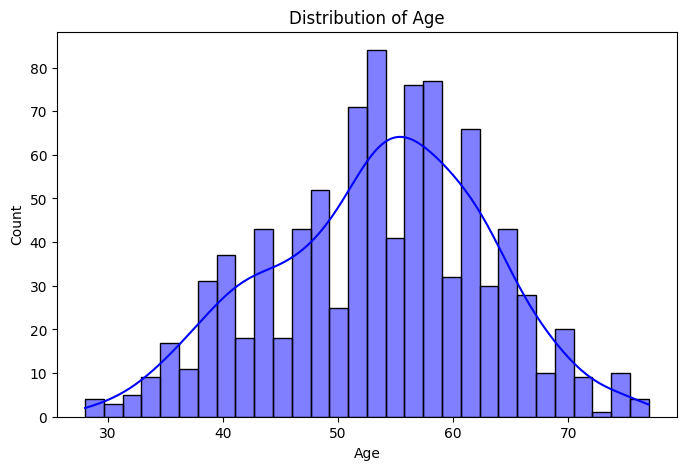

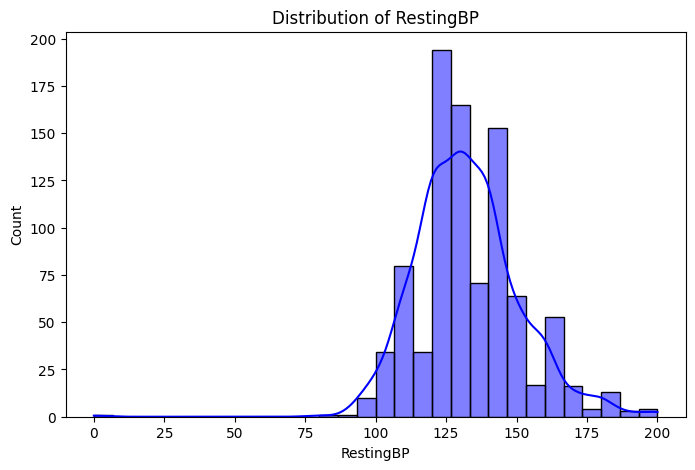

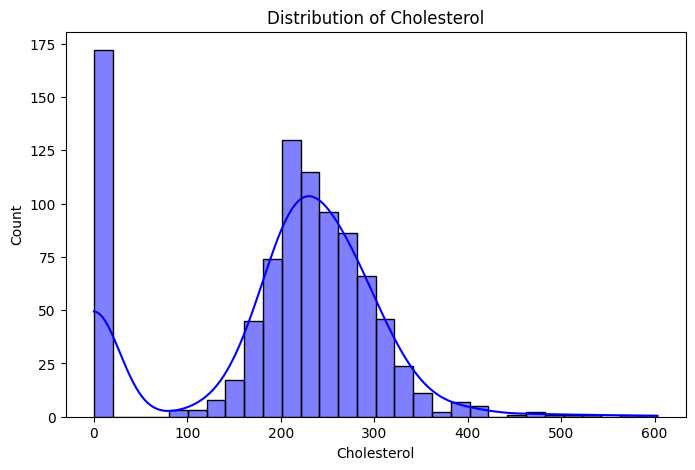

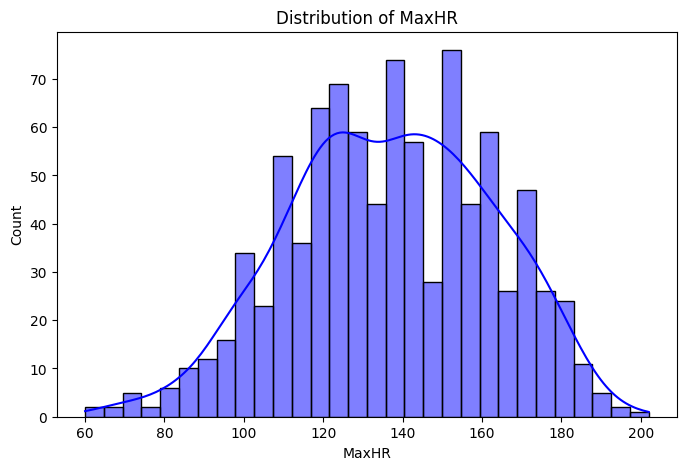

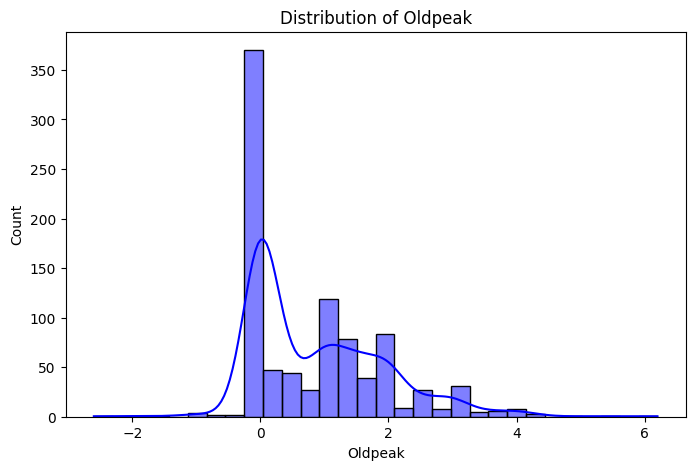

In [11]:
# Numerical feature distribution
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


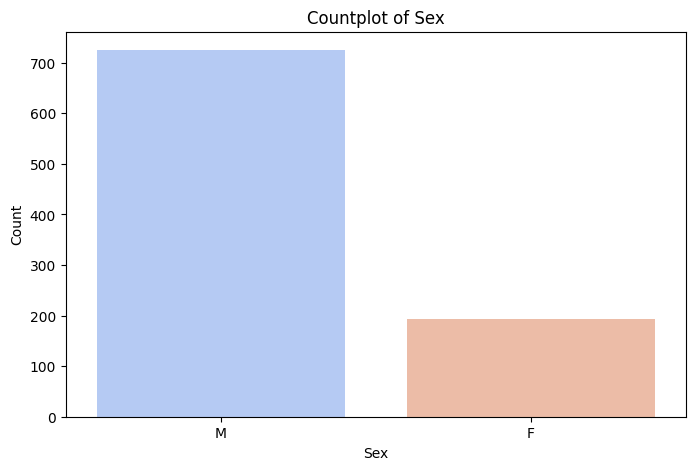

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


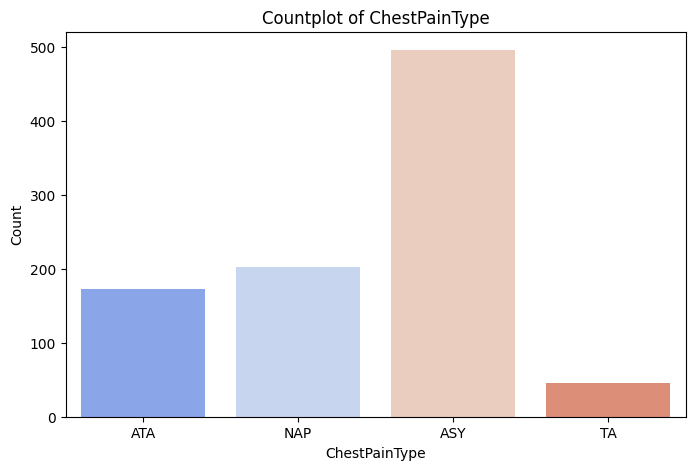

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


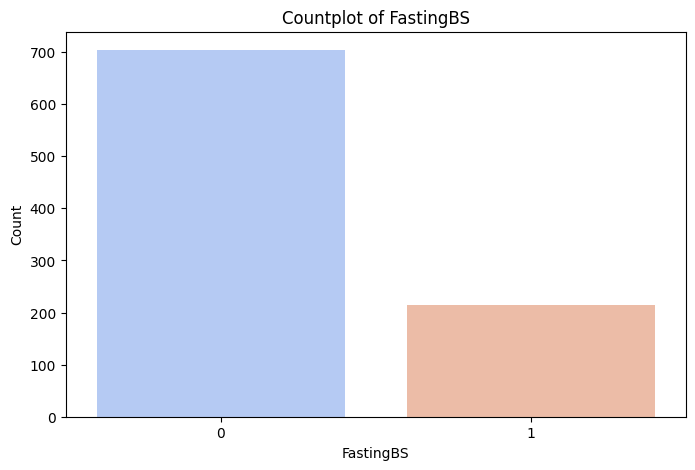

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


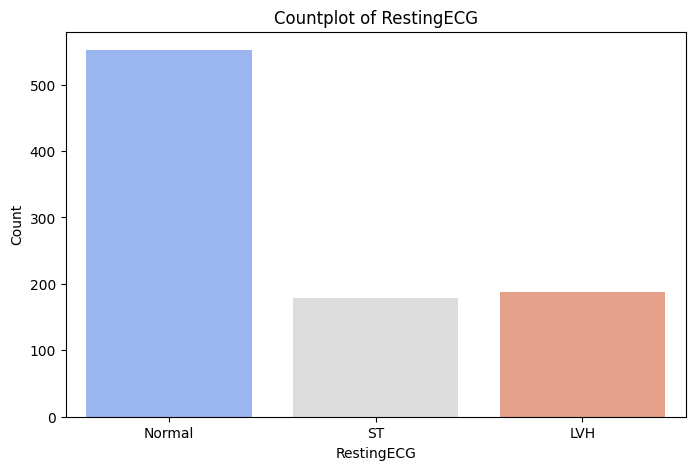

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


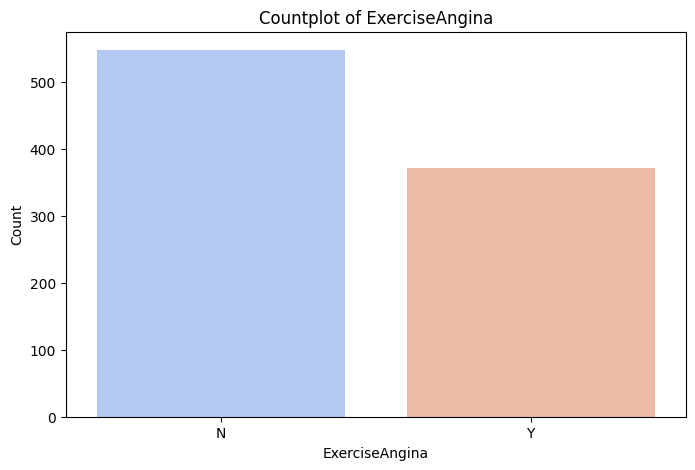

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3346915453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='coolwarm')


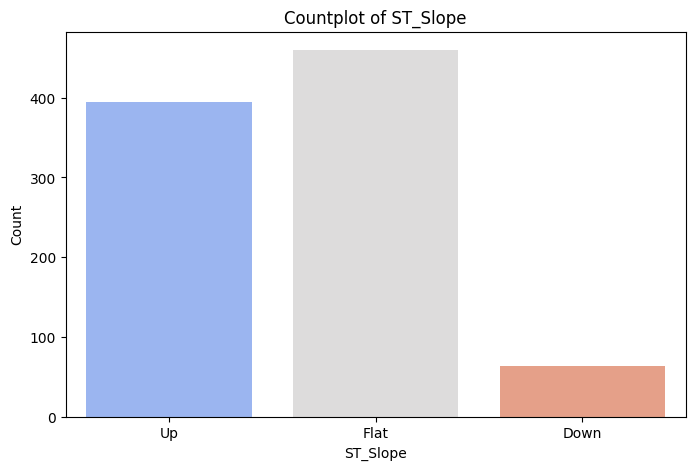

In [12]:
# Categorical feature distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data, palette='coolwarm')
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Multivariate analysis

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3912995628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')


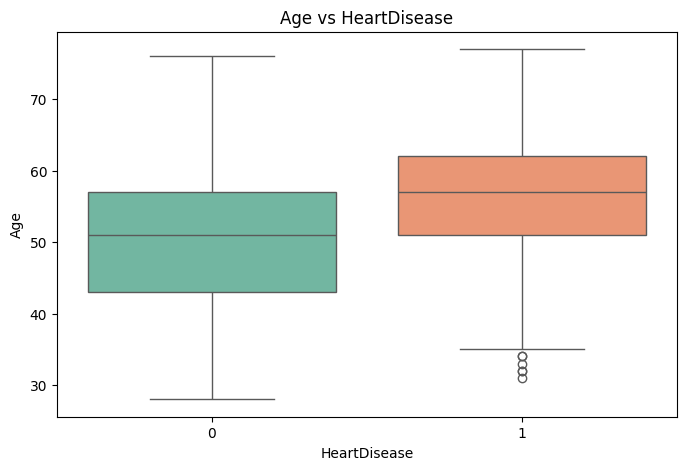

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3912995628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')


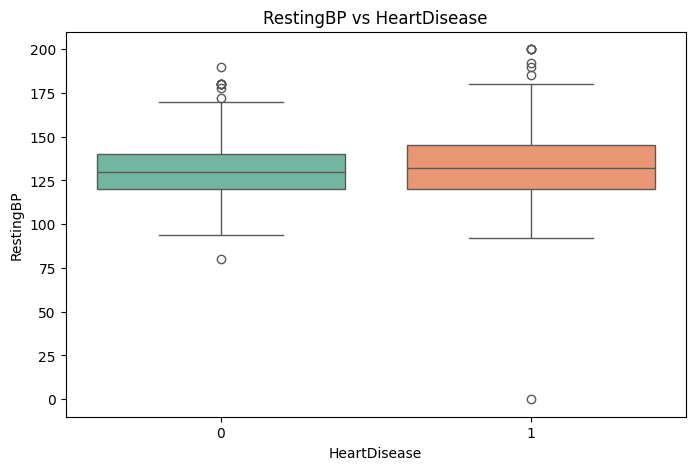

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3912995628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')


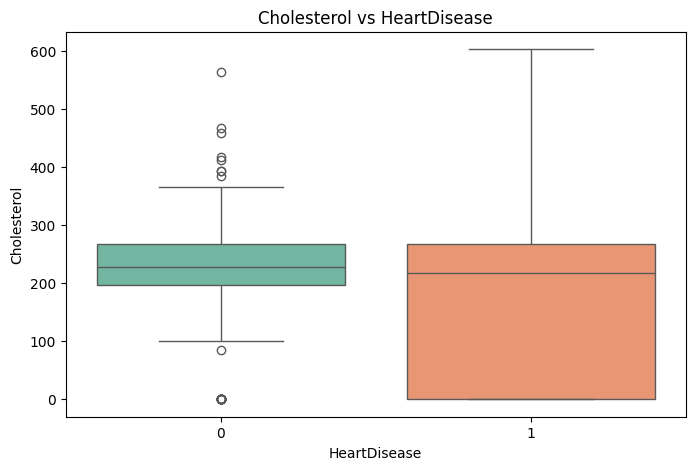

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3912995628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')


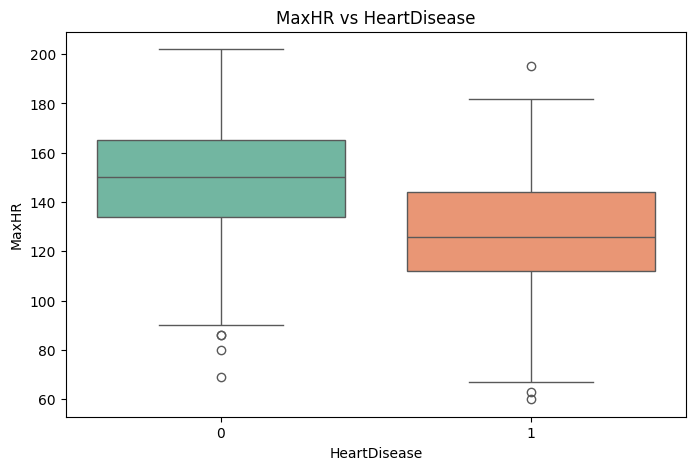

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3912995628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')


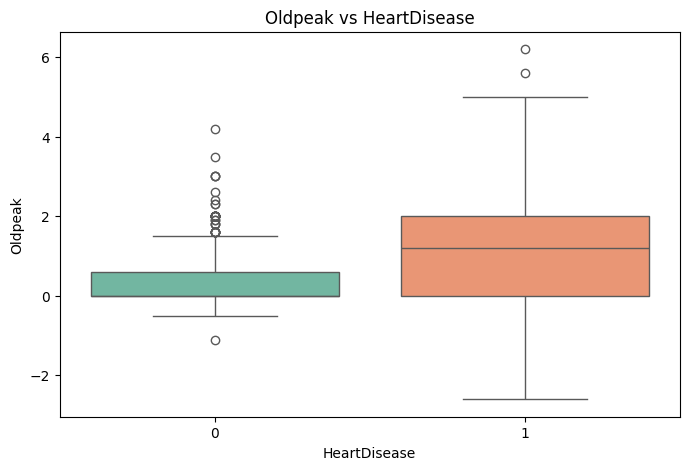

In [13]:
# Numerical features vs HeartDisease
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='HeartDisease', y=col, data=data, palette='Set2')
    plt.title(f"{col} vs HeartDisease")
    plt.xlabel('HeartDisease')
    plt.ylabel(col)
    plt.show()


C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3897434694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)


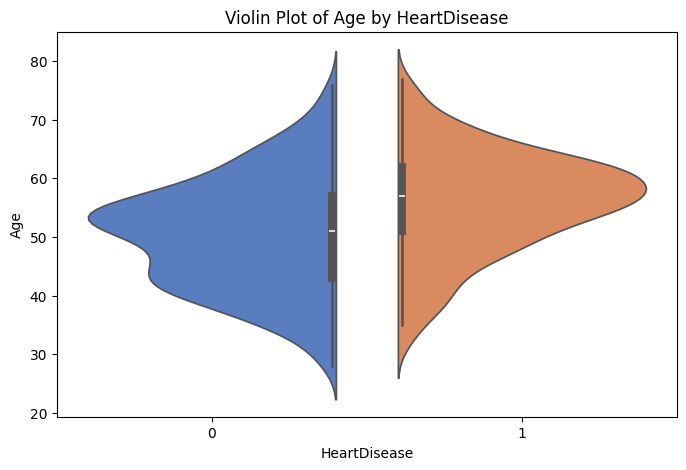

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3897434694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)


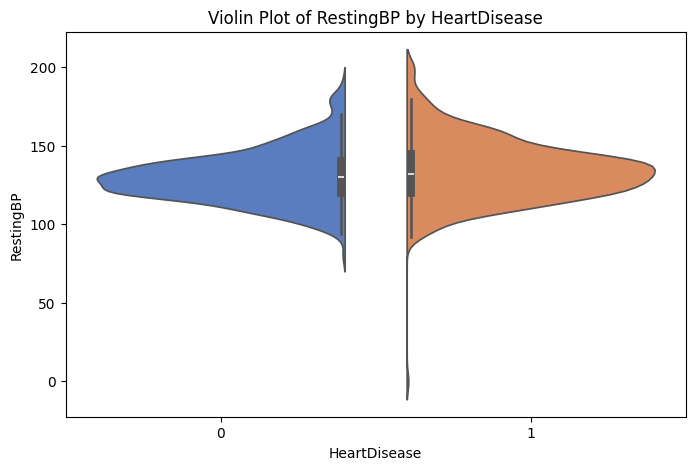

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3897434694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)


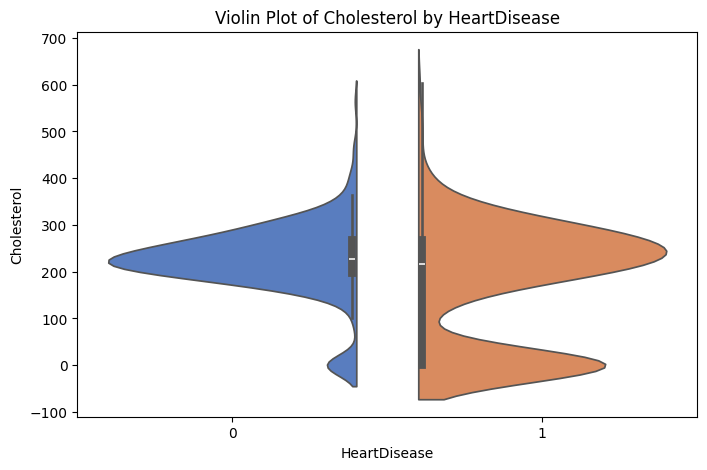

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3897434694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)


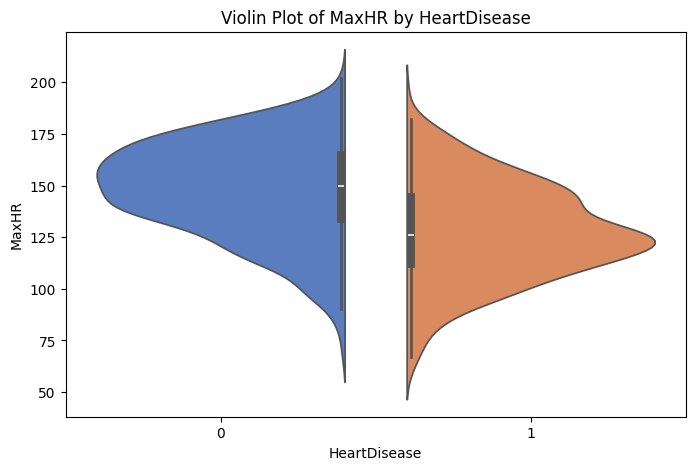

C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3897434694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)


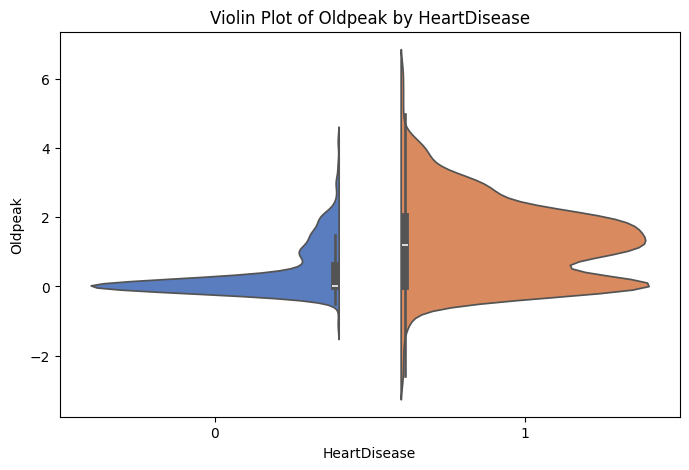

In [15]:
# Violin plot: Numerical features vs HeartDisease
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='HeartDisease', y=col, data=data, palette='muted', split=True)
    plt.title(f"Violin Plot of {col} by HeartDisease")
    plt.xlabel("HeartDisease")
    plt.ylabel(col)
    plt.show()


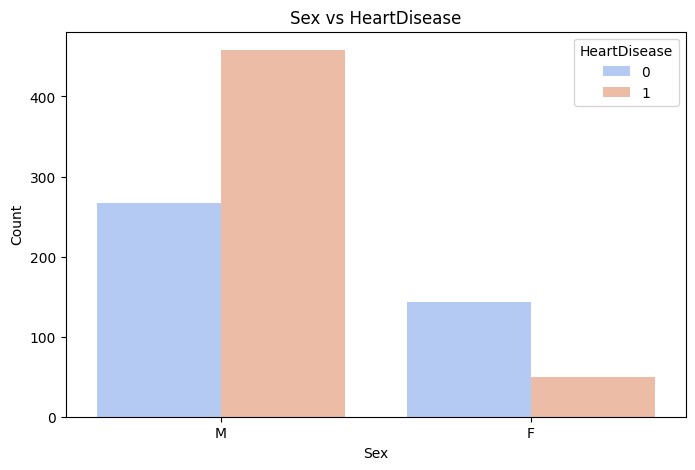

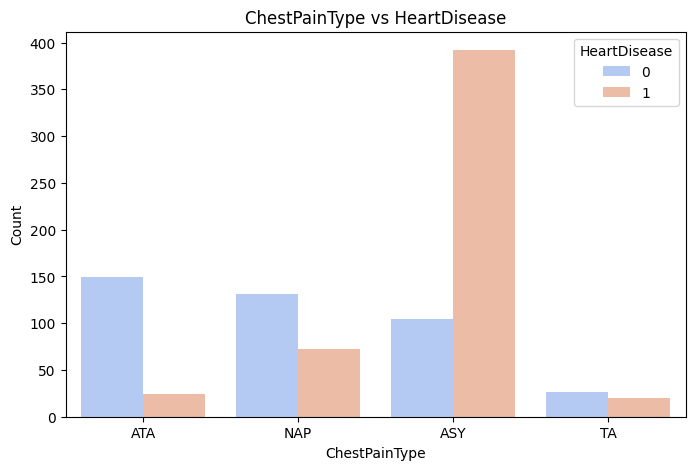

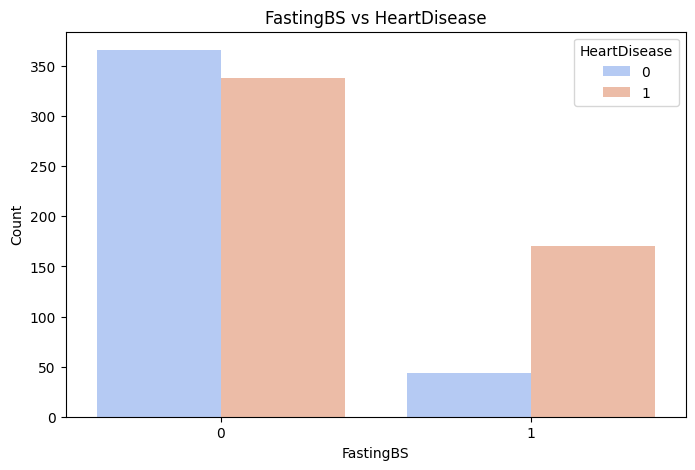

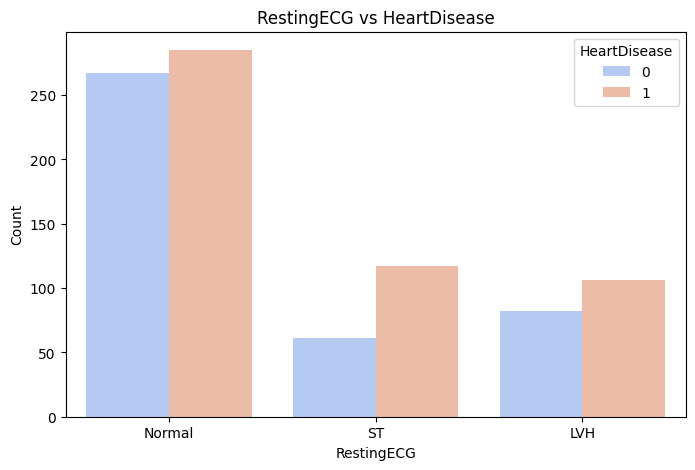

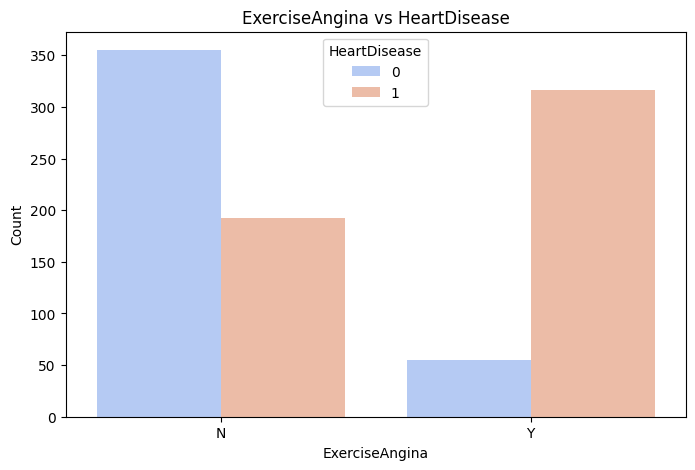

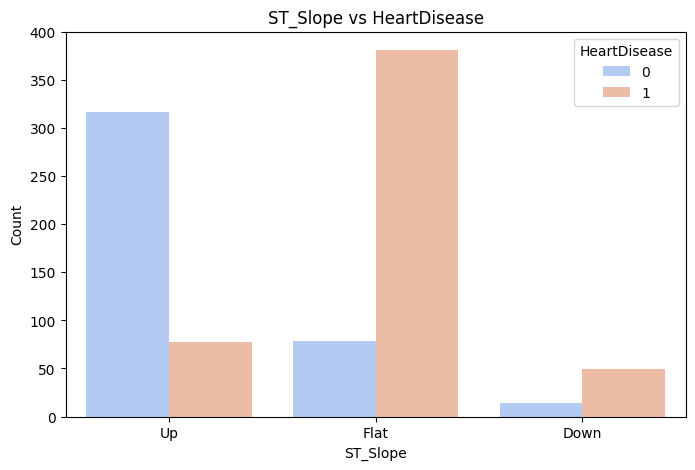

In [14]:
# Categorical Features vs HeartDisease
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='HeartDisease', data=data, palette='coolwarm')
    plt.title(f"{col} vs HeartDisease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


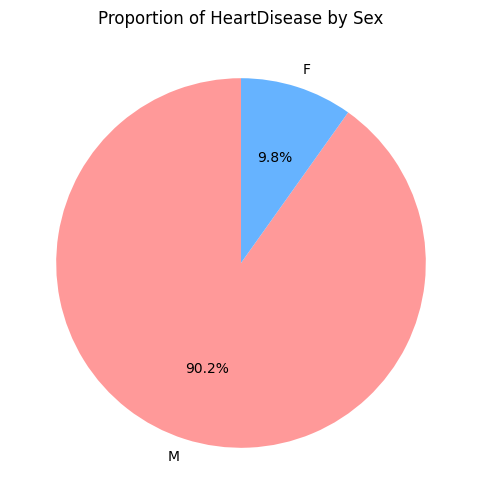

In [25]:
# Pie Chart: Proportion of HeartDisease by Sex
sex_heart_disease = data[data['HeartDisease'] == 1]['Sex'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(sex_heart_disease, labels=sex_heart_disease.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of HeartDisease by Sex')
plt.show()


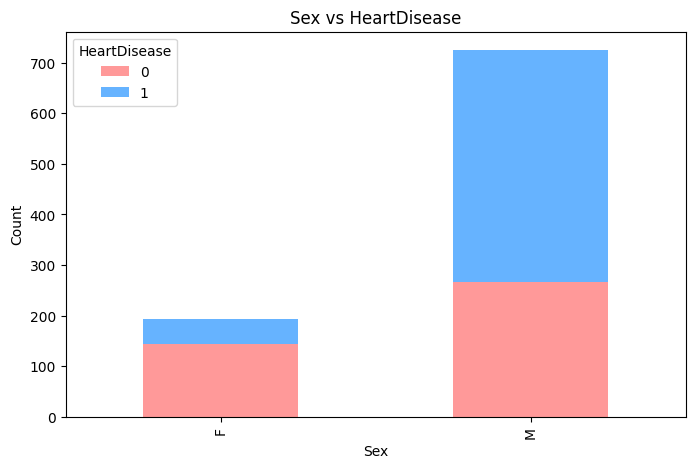

In [28]:
# Stacked Bar Chart: Sex vs HeartDisease

sex_hd = data.groupby(['Sex', 'HeartDisease']).size().unstack()

sex_hd.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#ff9999', '#66b3ff'])

plt.title('Sex vs HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.legend(title='HeartDisease')

plt.show()


### Correlation analysis between features

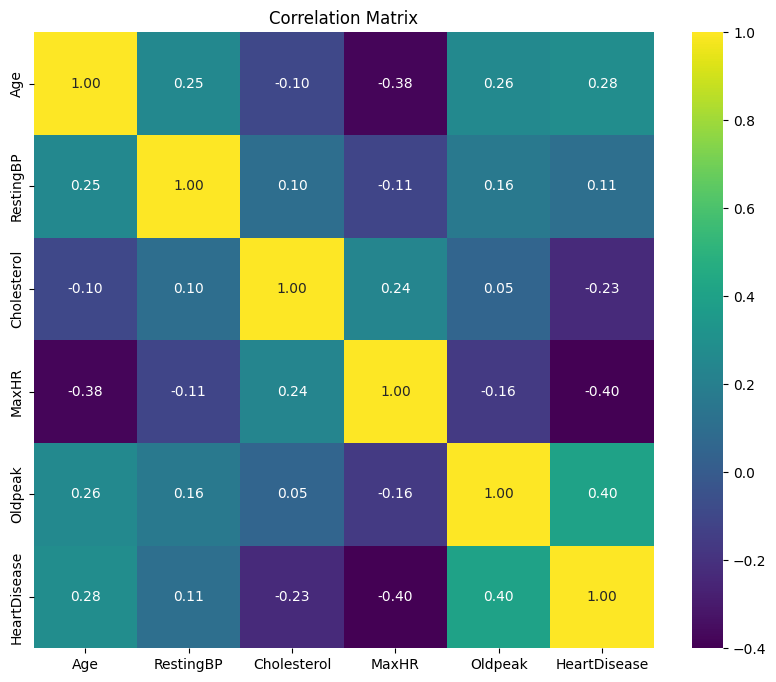

In [16]:
# 相关矩阵和热图
correlation_matrix = data[numerical_cols + ['HeartDisease']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### In-depth analysis of specific features

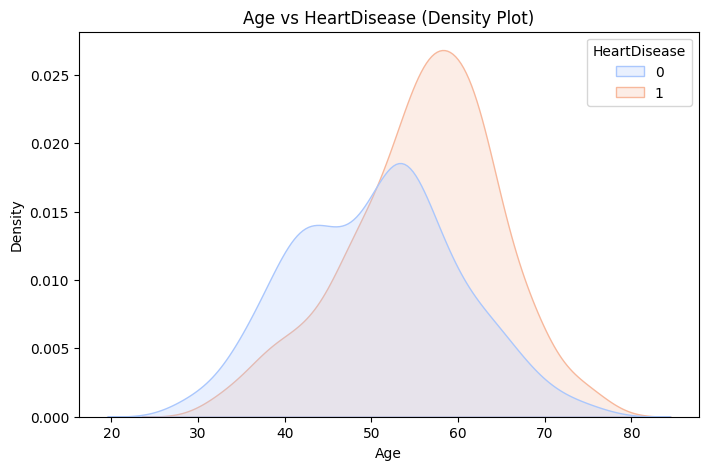

In [17]:
# Age vs HeartDisease
plt.figure(figsize=(8, 5))
sns.kdeplot(x='Age', hue='HeartDisease', data=data, fill=True, palette='coolwarm')
plt.title("Age vs HeartDisease (Density Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


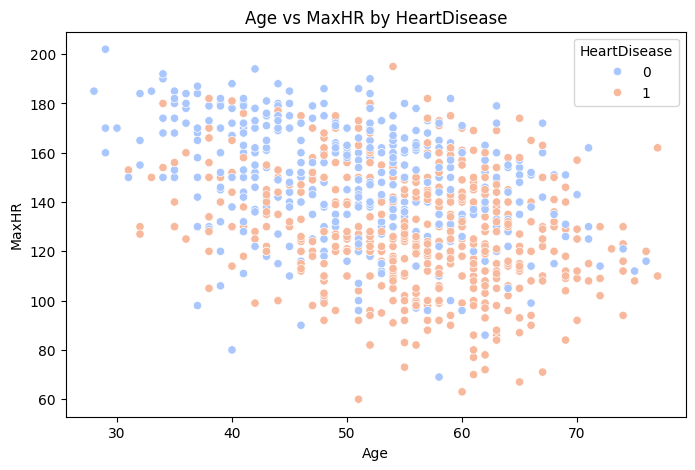

In [18]:
# Age vs MaxHR
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=data, palette='coolwarm')
plt.title("Age vs MaxHR by HeartDisease")
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.show()


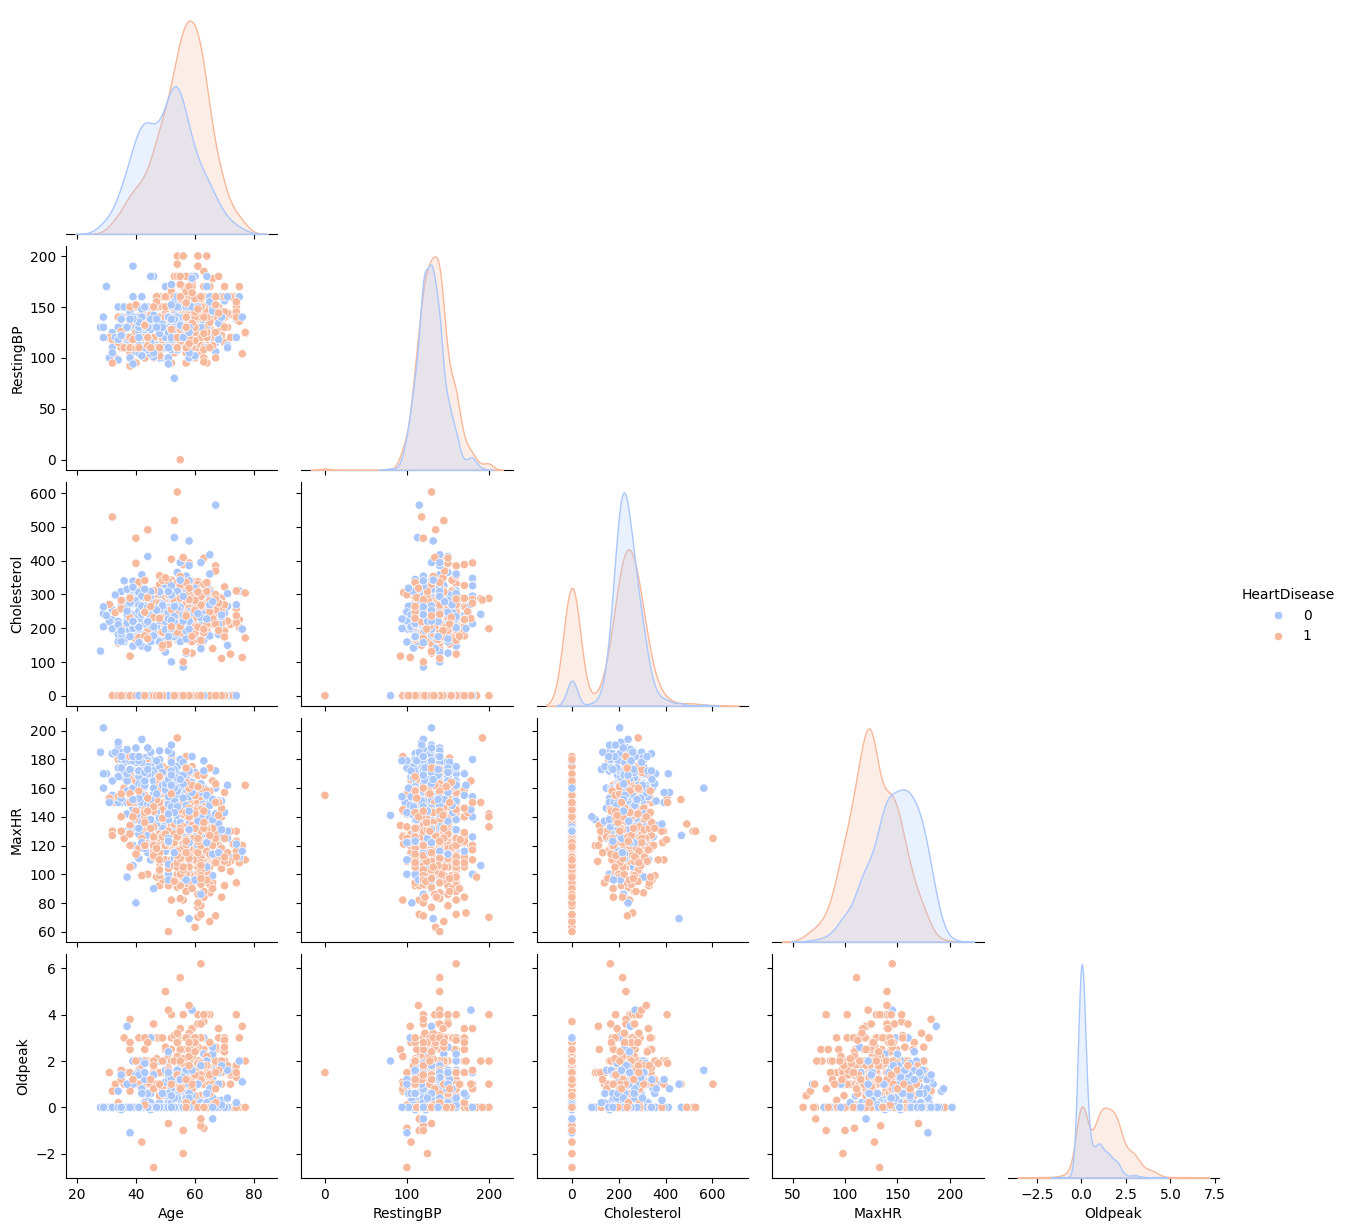

In [20]:
import seaborn as sns

# Pairplot
sns.pairplot(data, hue='HeartDisease', diag_kind='kde', palette='coolwarm', corner=True)
plt.show()


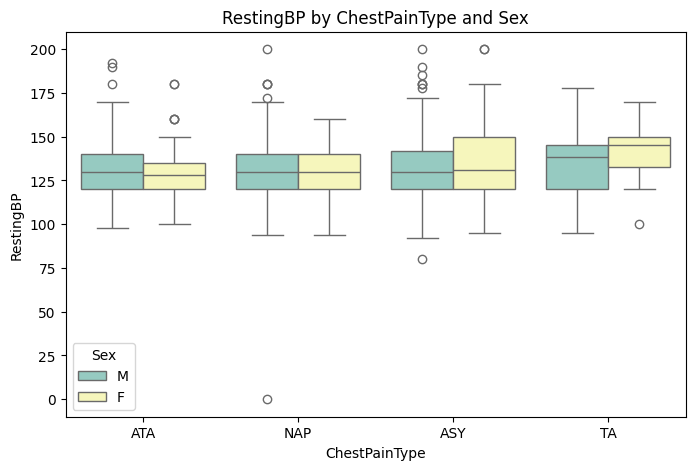

In [21]:
# Distribution of resting blood pressure by gender group, showing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='ChestPainType', y='RestingBP', hue='Sex', data=data, palette='Set3')
plt.title('RestingBP by ChestPainType and Sex')
plt.show()


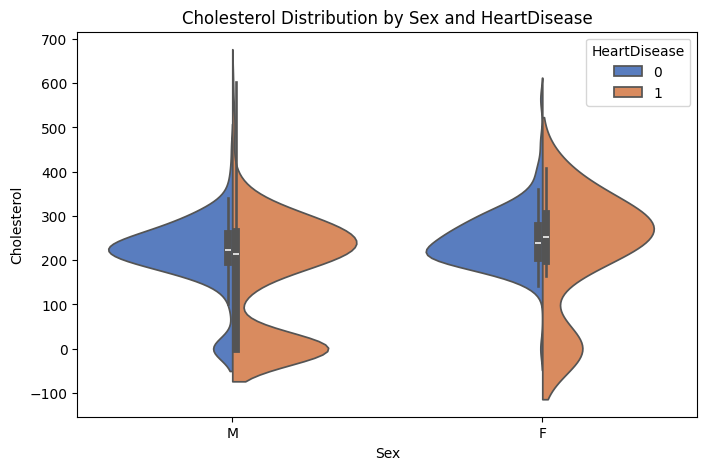

In [22]:
# Violin Plot: Cholesterol vs Sex
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=data, split=True, palette='muted')
plt.title('Cholesterol Distribution by Sex and HeartDisease')
plt.show()


C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\3667139671.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FastingBS', y='Age', hue='Sex', data=data, ci=None, palette='Set2')


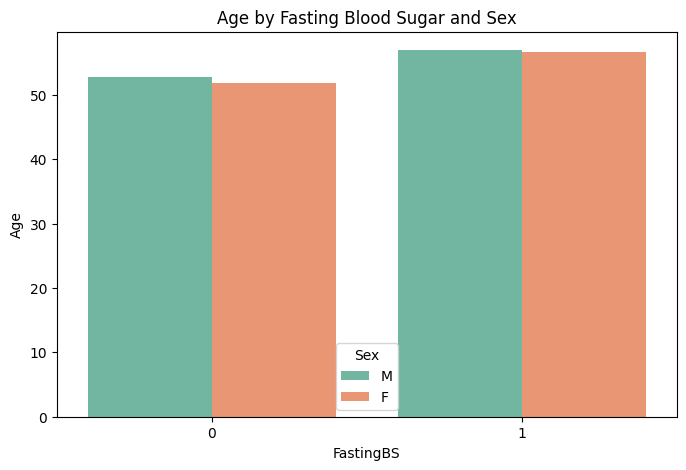

In [23]:
# Barplot: Age vs FastingBS
plt.figure(figsize=(8, 5))
sns.barplot(x='FastingBS', y='Age', hue='Sex', data=data, ci=None, palette='Set2')
plt.title('Age by Fasting Blood Sugar and Sex')
plt.xlabel('FastingBS')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()


C:\Users\lanxi\AppData\Local\Temp\ipykernel_30708\2028494636.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Age', y='MaxHR', hue='HeartDisease', style='Sex', data=data, markers=True, ci='sd', palette='coolwarm')


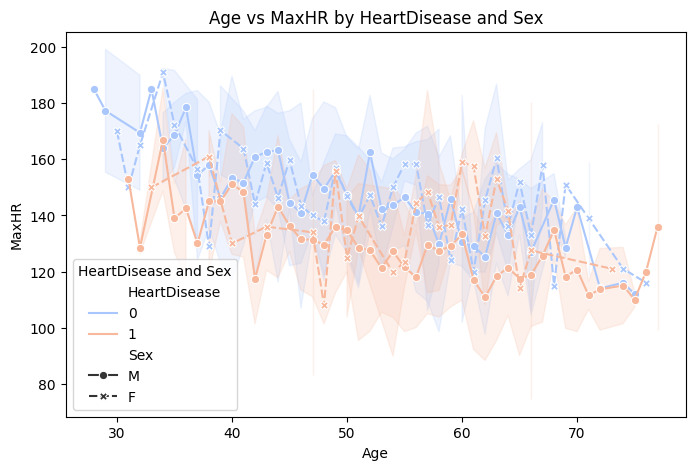

In [24]:
# Lineplot: Age vs MaxHR

plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='MaxHR', hue='HeartDisease', style='Sex', data=data, markers=True, ci='sd', palette='coolwarm')
plt.title('Age vs MaxHR by HeartDisease and Sex')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend(title='HeartDisease and Sex')
plt.show()


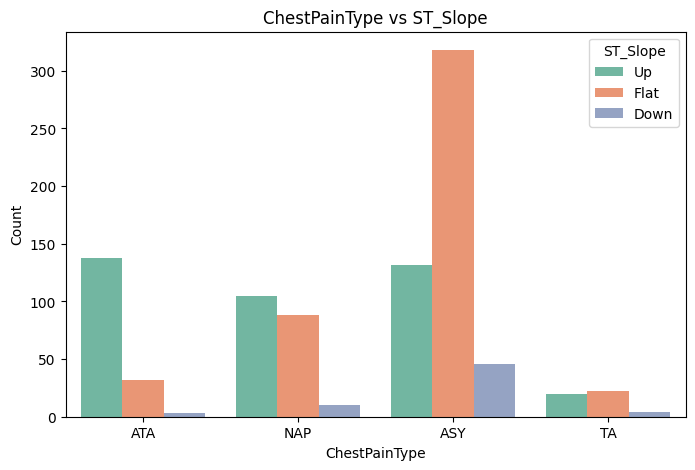

In [19]:
# ChestPainType vs ST_Slope
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', hue='ST_Slope', data=data, palette='Set2')
plt.title("ChestPainType vs ST_Slope")
plt.xlabel("ChestPainType")
plt.ylabel("Count")
plt.show()


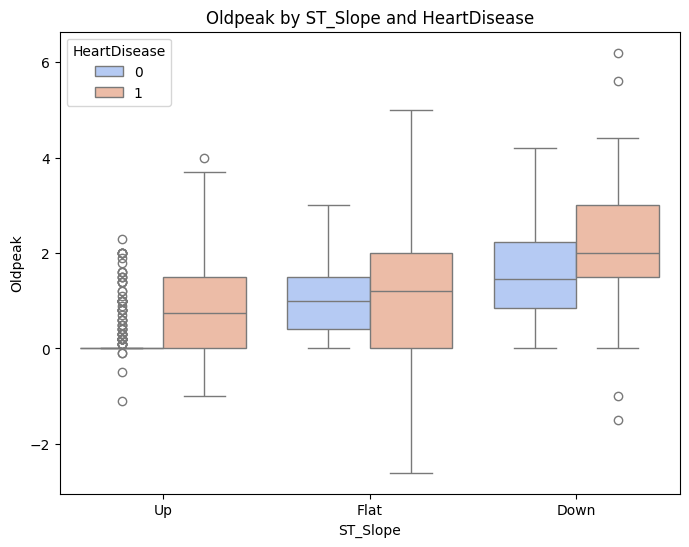

In [26]:
# Boxplot: Oldpeak by ST_Slope

plt.figure(figsize=(8, 6))
sns.boxplot(x='ST_Slope', y='Oldpeak', hue='HeartDisease', data=data, palette='coolwarm')

plt.title('Oldpeak by ST_Slope and HeartDisease')
plt.xlabel('ST_Slope')
plt.ylabel('Oldpeak')

plt.legend(title='HeartDisease')

plt.show()
